In [1]:
# Step 1: Update and install system dependencies
!apt-get update
!apt-get install -y build-essential libhdf5-dev python3-dev

# Step 2: Install Python dependencies
!pip install --upgrade pip setuptools wheel
!pip install cython
!pip install h5py  # Install latest h5py (avoid 2.10.0 for now)
!pip install tensorflow==2.10.0  # Compatible TensorFlow version for keras_segmentation

# Step 3: Clone or reuse the repository
import os
if os.path.exists("image-segmentation-keras"):
    !rm -rf image-segmentation-keras  # Remove existing directory
!git clone https://github.com/rajeevratan84/image-segmentation-keras.git

# Step 4: Navigate to directory and install the package
%cd image-segmentation-keras

# Fix deprecated setup.cfg (replace description-file with description_file)
!sed -i 's/description-file/description_file/' setup.cfg

# Install the package using pip
!pip install .

# Step 5: Verify installation
!python -c "import keras_segmentation; print('keras_segmentation installed successfully')"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 6,555 B in 2s (3,466 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... D

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.10.0
Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 1165, done.
remote: Total 1165 (delta 0), reused 0 (delta 0), pack-reused 1165 (from 1)
Receiving objects: 100% (1165/1165), 3.29 MiB | 43.18 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/image-segmentation-keras
Processing /content/image-segmentation-keras
  Preparing metadata (setup.py) ... done
  Using cached h5py-2.10.0.tar.gz (301 kB)
  Preparing metadata (setup.py) ... done
  Using cached imageio-2.5.0-py3-none-any.whl.metadata (2.8 

In [2]:
%cd /content/image-segmentation-keras
! python setup.py install

/content/image-segmentation-keras
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:90: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        By 2025-Oct-31, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
running build
running build_py
copying keras_segmentation/__main__.py -> build/lib/keras_segmentation
copying keras_segmentation/model_compression.py -> build/lib/keras_segmentation
copying keras_segmentation/metrics.py -> build/lib

In [3]:
# %cd /content/
# !wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip -q dataset1.zip

In [4]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640)
model.summary()

Error in loading augmentation, can't import imgaug.Please make sure it is installed.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 320, 640,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 320, 640,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 320, 640,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 160, 320,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 160, 320,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 160, 320,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 80, 160,   │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 80, 160,   │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 80, 160,   │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 80, 160,   │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 40, 80,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 40, 80,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 40, 80,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 40, 80,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 20, 40,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 22, 42,    │          0 │ block4_pool[0][0] │
│ (ZeroPadding2D)     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 20, 40,    │  2,359,808 │ zero_padding2d[0

 Total params: 12,350,642 (47.11 MB)

 Trainable params: 12,348,722 (47.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [5]:
train_image="/content/dataset1/images_prepped_train"
train_annot="/content/dataset1/annotations_prepped_train"

In [7]:
history=model.train(train_images = train_image,train_annotations =train_annot, epochs=5)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 139.53it/s]


Dataset verified! 
Epoch 1/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 140s 210ms/step - accuracy: 0.6732 - loss: 1.2699
Epoch 2/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 107s 209ms/step - accuracy: 0.8409 - loss: 0.5120
Epoch 3/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 107s 208ms/step - accuracy: 0.8757 - loss: 0.3951
Epoch 4/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 107s 208ms/step - accuracy: 0.8983 - loss: 0.3155
Epoch 5/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 107s 209ms/step - accuracy: 0.9082 - loss: 0.2815


In [19]:
%cd /content/
output = model.predict_segmentation(inp="/content/dataset1/images_prepped_test/0016E5_07959.png",out_fname="/content/out.png")

/content
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


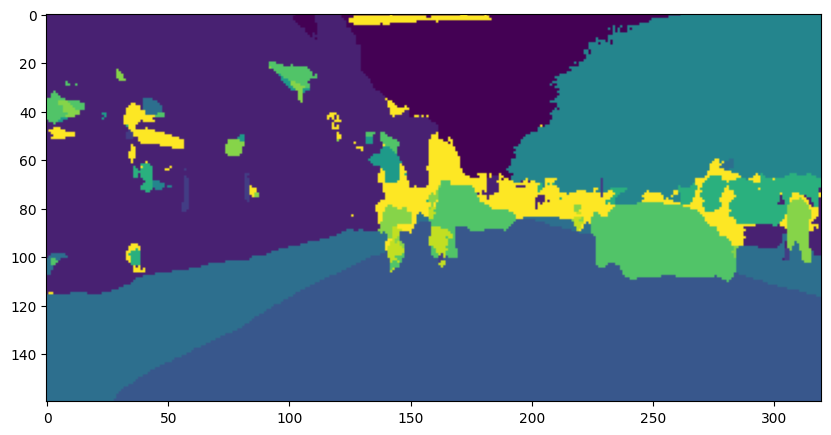

In [21]:
from io import IncrementalNewlineDecoder
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.show()

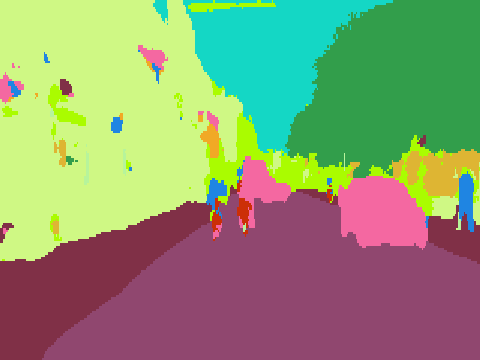

In [22]:
from IPython.display import Image
Image("/content/out.png")

# Display with Legend

In [23]:
%cd /content/
output = model.predict_segmentation(inp="/content/dataset1/images_prepped_test/0016E5_07959.png",out_fname="/content/newout.png",
                                    class_names = [ "Sky", "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"])

/content
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


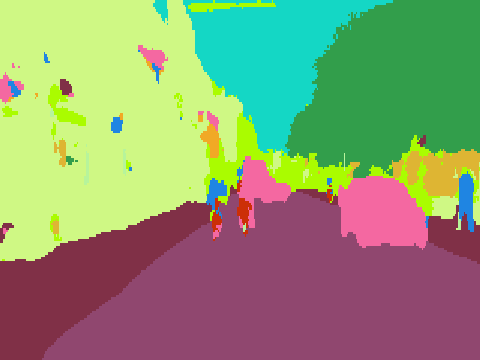

In [24]:
from IPython.display import Image
Image('/content/newout.png')

# Now let's load and train a SegNet Model

In [25]:
from keras_segmentation.models.segnet import segnet

model = segnet(n_classes=50 ,  input_height=320, input_width=640)

history=model.train(train_images = train_image,train_annotations =train_annot, epochs=5)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 142.57it/s]


Dataset verified! 
Epoch 1/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 97s 149ms/step - accuracy: 0.6693 - loss: 1.2609
Epoch 2/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 76s 148ms/step - accuracy: 0.7933 - loss: 0.6765
Epoch 3/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 76s 148ms/step - accuracy: 0.8126 - loss: 0.6039
Epoch 4/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 76s 148ms/step - accuracy: 0.8323 - loss: 0.5388
Epoch 5/5
512/512 ━━━━━━━━━━━━━━━━━━━━ 76s 148ms/step - accuracy: 0.8471 - loss: 0.4841


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


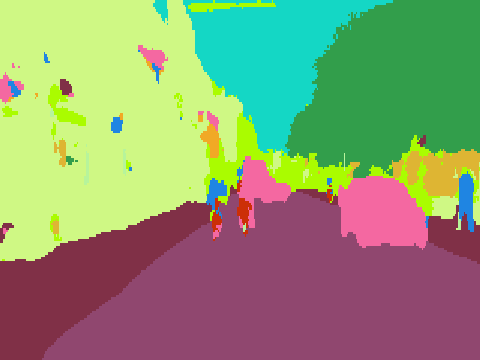

In [26]:
from IPython.display import Image

out = model.predict_segmentation(inp = "/content/dataset1/images_prepped_test/0016E5_07959.png",out_fname = "/content/out_1.png")

Image('/content/out.png')